## Import packages and load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Inspect data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Notes:**
- Name, sex, ticket, cabin, embarked --> need to be converted into numerical
- Age, cabin, and embarked have NULL values
- PassengerId offers no useful information (just row values); Name and ticket likely have no bearing as well

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

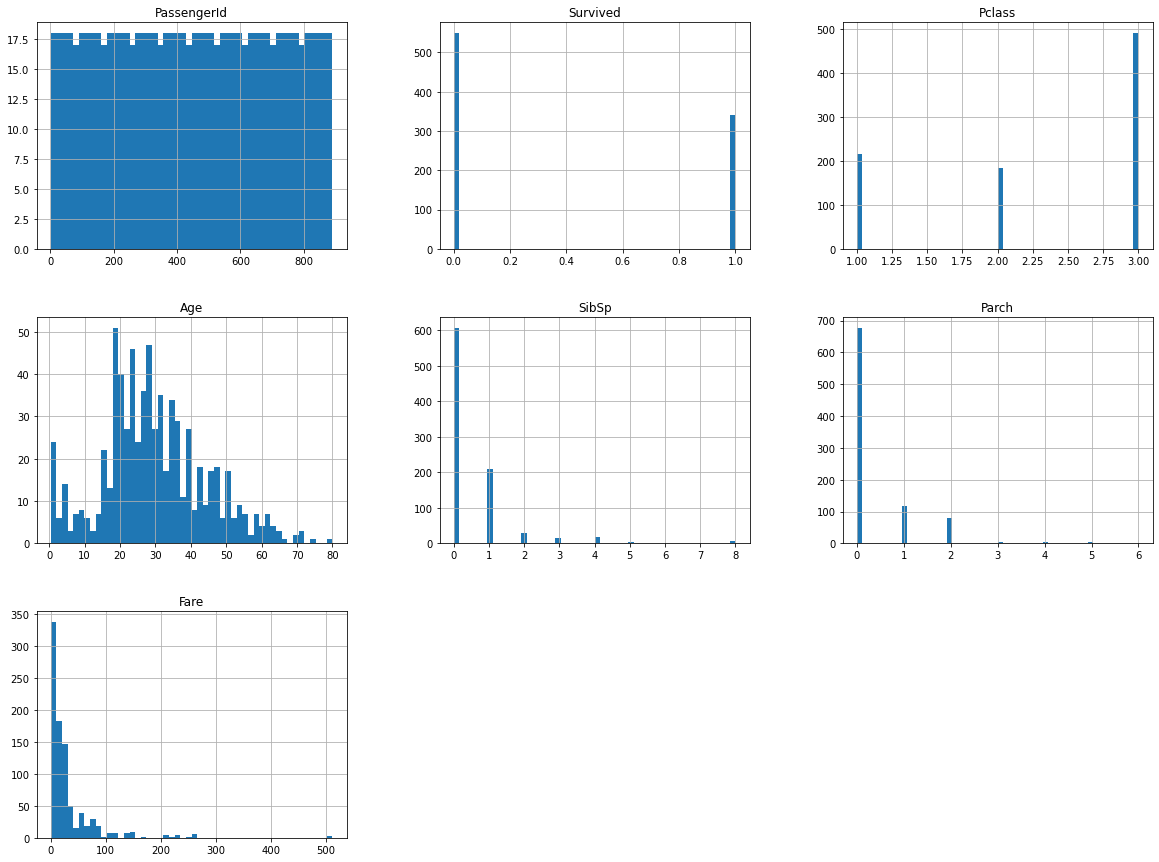

In [6]:
train.hist(bins=50, figsize=(20,15))

**Note:**
- Histogram plots for all numerical features seem normal. One outlier in fare price (>500).

## Look for correlations

In [7]:
corr_matrix = train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

**Notes:**
- Fare and Pclass are the only two features which are significantly correlated with survival.

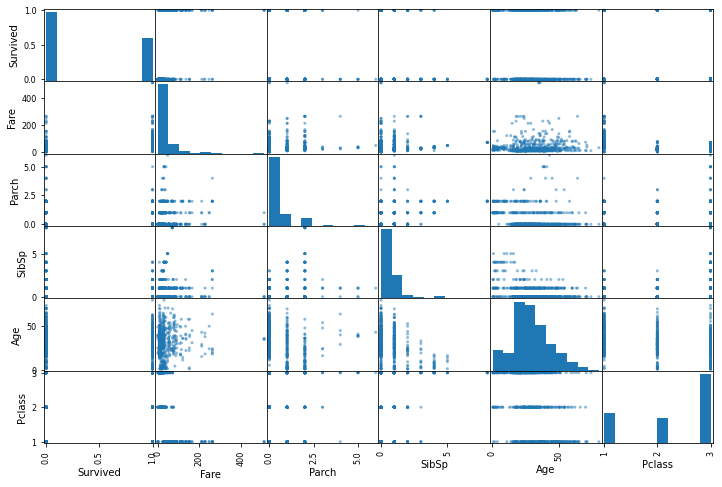

In [8]:
from pandas.plotting import scatter_matrix

attributes = ['Survived', 'Fare', 'Parch', 'SibSp', 'Age', 'Pclass']
scatter_matrix(train[attributes], figsize=(12, 8));

## Prep data for classifier

In [61]:
# drop labels for training set
train_X = train.drop('Survived', axis=1)
train_y = train['Survived'].copy()

In [62]:
# Remove likely irrelevant features
train_X_num = train_X.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'Parch', 'SibSp', 'Age'])
train_X_cat = train[['Embarked', 'Sex']]

In [63]:
# impute age using median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [64]:
imputer.fit(train_X_num)
imputer.statistics_

array([ 3.    , 14.4542])

In [65]:
X = imputer.transform(train_X_num)

In [66]:
X_df = pd.DataFrame(X, columns=train_X_num.columns, index=train_X_num.index)

In [67]:
# check if imputer replaced all null values
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    float64
 1   Fare    891 non-null    float64
dtypes: float64(2)
memory usage: 14.0 KB


In [68]:
# convert sex to numeric using one-hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
train_X_cat_1hot = cat_encoder.fit_transform(train_X_cat)
train_X_cat_1hot

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

## Custom transformers

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin

# drop categorical columns
class columnDropperTransformer(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(self.columns, axis=1)

## Transformation pipelines

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('columnDropper', columnDropperTransformer(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex'])),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

train_X_num_tr = num_pipeline.fit_transform(train_X)

In [71]:
train_X_num_tr.shape

(891, 5)

In [72]:
from sklearn.compose import ColumnTransformer

num_attribs = list(train_X)
cat_attribs = ['Sex']

# combine numerical pipeline with encoder
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

train_X_prepared = full_pipeline.fit_transform(train_X)

In [73]:
train_X_prepared.shape

(891, 7)

## Select and train a model

In [74]:
from sklearn.model_selection import cross_val_score
import numpy as np

def mean_crossval_score(model):
    val_scores = cross_val_score(model, train_X_prepared, train_y, cv=10, scoring="accuracy")
    mean_val_score = np.mean(val_scores)
    print('mean validation score:', str(round(mean_val_score, 3)))

#### SGDClassifier

In [75]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(train_X_prepared, train_y)
mean_crossval_score(sgd_clf)

mean validation score: 0.783


#### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr.fit(train_X_prepared, train_y)
mean_crossval_score(lgr)

mean validation score: 0.788


#### Support Vector Machine

In [77]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(train_X_prepared, train_y)
mean_crossval_score(svm)

mean validation score: 0.826


#### XGBoost

In [78]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
xgb.fit(train_X_prepared, train_y)
mean_crossval_score(xgb)

mean validation score: 0.815


#### k-neighbors

In [79]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_X_prepared, train_y)
mean_crossval_score(kn)

mean validation score: 0.821


## Fine tune model

Best model: SVM

In [39]:
from sklearn.model_selection import cross_val_predict
train_y_pred = cross_val_predict(svm, train_X_prepared, train_y, cv=10)

from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve
confusion_matrix(train_y, train_y_pred)

array([[492,  57],
       [ 98, 244]], dtype=int64)

In [40]:
f1_score(train_y, train_y_pred)

0.7589424572317263

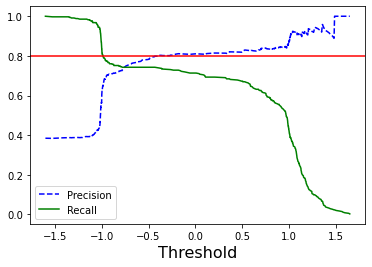

Text(0, 0.5, 'Precision')

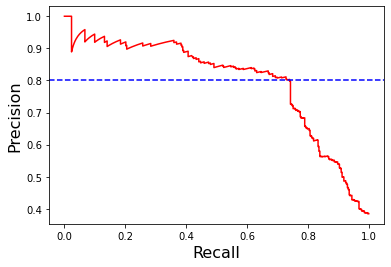

In [102]:
y_scores = cross_val_predict(svm, train_X_prepared, train_y, cv=10, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(train_y, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.axhline(y=0.8, color='r', linestyle='-')    # optimal precision line
plt.xlabel('Threshold', fontsize=16)
plt.legend()
plt.show()
plt.plot(recalls, precisions, "r", label="PR_curve")
plt.axhline(y=0.8, color='b', linestyle='--')    # optimal precision line
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)

In [126]:
# test optimal threshold
optimal_precision = 0.8
threshold_optimal = thresholds[np.argmax(precisions >= optimal_precision)] # find threshold corresponding to optimal precision
train_y_pred_optimal = (y_scores >= threshold_optimal)

from sklearn.metrics import accuracy_score
round(accuracy_score(train_y, train_y_pred_optimal), 3)

0.829

We see a slight improvement of about 0.003 from changing the threshold.

## Evaluate system on test set

In [32]:
# process test set then feed to model
test_prepared = full_pipeline.transform(test)
final_predictions = svm.predict(test_prepared)

In [33]:
final_predictions.shape

(418,)

In [34]:
predictions_df = pd.DataFrame(final_predictions, columns=['Survived'], index=test.index)

In [35]:
predictions_df['PassengerId'] = test['PassengerId']

In [36]:
predictions_df

,Survived,PassengerId
0,0,892
1,1,893
2,0,894
3,0,895
4,1,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308


In [37]:
cols = predictions_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
predictions_df = predictions_df[cols]
predictions_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [38]:
predictions_df.to_csv('submission.csv', index=False)